# Problem Statement

#### Task 1:-Prepare a complete data analysis report on the given data.

#### Task 2:- Explore football skills and cluster football players based on their attributes.

#### Task3:- Explore the data and attempt all the below asked questions in a step by step manner:

  #### ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this lev? 
#### ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving? 
#### ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 



## Import Laibraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
df=pd.read_csv('players_20.csv')

# Data Analysis

### Basic checks

In [3]:
# Getting the first 5 rows
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
# Getting the last 5 rows
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [53]:
# Set the maximum number of rows displayed to None to view all rows
pd.set_option('display.max_columns',104)

In [6]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [7]:
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [172]:
# reset the hide all columns to reduce time span
pd.reset_option('display.max_columns',None)

In [9]:
# Getting shape of data means number of rows and columns
df.shape

(18278, 104)

In [10]:
df.size

1900912

In [11]:
# Getting information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [17]:
# Getting number of null values
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [18]:
# Geeting the data types of data
df.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [19]:
# Getting duplicated values
df.duplicated().sum()

0

In [20]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

# Exploratory Data Analysis == EDA

## Univariatae analysis

In [45]:
! pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import sweetviz as sz
report=sz.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [49]:
# Save the report to an HTML file
#report.save_html('path/to/report.html')

In [10]:
df1=df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur','club','nationality',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [11]:
df1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,club,nationality,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,FC Barcelona,Argentina,565000,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,Juventus,Portugal,405000,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,Paris Saint-Germain,Brazil,290000,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,Atlético Madrid,Slovenia,125000,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,Real Madrid,Belgium,470000,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,Beijing Renhe FC,China PR,2000,...,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,Shanghai SIPG FC,China PR,2000,...,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,Hebei China Fortune FC,China PR,1000,...,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,Shanghai Greenland Shenhua FC,China PR,1000,...,36,40,39,44,54,14,9,13,13,13


In [7]:
df1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,club,nationality,wage_eur,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,FC Barcelona,Argentina,565000,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,Juventus,Portugal,405000,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,Paris Saint-Germain,Brazil,290000,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,Atlético Madrid,Slovenia,125000,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,Real Madrid,Belgium,470000,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,Beijing Renhe FC,China PR,2000,...,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,Shanghai SIPG FC,China PR,2000,...,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,Hebei China Fortune FC,China PR,1000,...,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,Shanghai Greenland Shenhua FC,China PR,1000,...,36,40,39,44,54,14,9,13,13,13


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   club                        18278 non-null  object 
 8   nationality                 18278 non-null  object 
 9   wage_eur                    18278 non-null  int64  
 10  international_reputation    18278 non-null  int64  
 11  weak_foot                   18278 non-null  int64  
 12  skill_moves                 18278 non-null  int64  
 13  release_clause_eur          169

In [25]:
df1.shape

(18278, 63)

In [26]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [27]:
pd.set_option('display.max_columns',None)

In [28]:
df1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,club,nationality,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,FC Barcelona,Argentina,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,Juventus,Portugal,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,Paris Saint-Germain,Brazil,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,Atlético Madrid,Slovenia,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,Real Madrid,Belgium,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,Beijing Renhe FC,China PR,2000,1,3,2,70000.0,36.0,2019.0,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,Shanghai SIPG FC,China PR,2000,1,2,2,72000.0,31.0,2022.0,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,Hebei China Fortune FC,China PR,1000,1,2,2,70000.0,38.0,2019.0,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,Shanghai Greenland Shenhua FC,China PR,1000,1,2,2,70000.0,33.0,2022.0,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [29]:
# filtering dataset the players with an overall rating greater than 86.
df1=df1[df1.overall>86]

In [30]:
df1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,club,nationality,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,FC Barcelona,Argentina,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,Juventus,Portugal,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,Paris Saint-Germain,Brazil,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,Atlético Madrid,Slovenia,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,Real Madrid,Belgium,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,Manchester City,Belgium,370000,4,5,4,166500000.0,17.0,2023.0,7.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,FC Barcelona,Germany,250000,3,4,1,143400000.0,1.0,2022.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,Liverpool,Netherlands,200000,3,3,2,150200000.0,4.0,2023.0,4.0,77.0,60.0,70.0,71.0,90.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,Real Madrid,Croatia,340000,4,4,4,92300000.0,10.0,2020.0,NaN,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,Liverpool,Egypt,240000,3,3,4,148900000.0,11.0,2023.0,10.0,93.0,86.0,81.0,89.0,45.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14


In [31]:
#Saving names
names=df1.short_name.tolist()
clubs=df1.club.tolist()
nationality=df1.nationality.tolist()
df1=df1.drop(['short_name','club','nationality'],axis=1)

In [42]:
df1.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


# Domain Analysis

## Columns Name:
### ●	Name: Name of the player. 
### ●	Age: Age of the player.
### ●	Height: Height of the player in inches (transformed to centimeters in preprocessing).
### ●	Overall: General performance quality and value of the player representing the key positional skills and  international reputation rated between 1-99. Overall attribute is used only in preprocessing and discussion stages because using it in modelling could lead to domination by this feature. The aim of the project is not basically sort and categorize the players using their overall talent and international reputation, but to cluster them based on   using their whole skillset.
### ●	Potential: Maximum Overall rating expected to be reached by a player in the top of his career rated between             1-99.
### ●	PreferredFoot: Right or Left. Label encoder is applied as 0 for left and 1 for right.
### ●	WeakFoot: Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
### ●	WorkRate: Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0 for low, 0.5 for medium and 1 for high.
### ●	Position: Position of the players on the pitch which determines their roles and responsibilities in the team. Forward   positions in the football and FIFA 19 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). The word, forward, is used both as a general term and a special position. Strikers are positioned in front of forwards and wingers and very closed to the opposing goal. Their main responsibilities are attacking and scoring goals, that’s why their ball control, shooting and finishing skills are expected to be well. Center forwards are positioned right behind the strikers. They are expected to receive balls from the others and score assists to the others or goals. In addition to the skills expected from strikers, they have to be good at passing. Right forwards and left forwards are positioned at the right and left of the center forwards with the same expectations. Wingers are positioned near the touchlines to create chances for strikers and forwards from the right and left side of the field by breakthrough and crosses and to score goals. They are expected to be good at dribbling, acceleration, passing and crossing. Positions are used only in preprocessing and discussion stages. 
### ●	ST: Positional skill. Player’s general ability when playing in ST position rated between 1-99.
### ●	RS: Positional skill. Player’s general ability when playing in in RS position rated between 1-99.
### ●	LS: Positional skill. Player’s general ability when playing in in LS position rated between 1-99.
### ●	CF: Positional skill. Player’s general ability when playing in in CF position rated between 1-99.
### ●	RF: Positional skill. Player’s general ability when playing in in RF position rated between 1-99.
### ●	LF: Positional skill. Player’s general ability when playing in in LF position rated between 1-99.
### ●	RW: Positional skill. Player’s general ability when playing in in RW position rated between 1-99.
### ●	LW: Positional skill. Player’s general ability when playing in in LW position rated between 1-99.
### ●	Crossing: Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
### ●	Finishing: Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by                scoring a goal.
### ●	HeadingAccuracy: Player’s accuracy to pass or shoot by using his head rated between 1-99.
### ●	ShortPassing: Player’s accuracy for short passes rated between 1-99.
### ●	LongPassing: Player’s accuracy for long passes rated between 1-99.
### ●	Dribbling: Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while              moving in one particular direction.
### ●	SprintSpeed: Speed rate of the player rated between 1-99.
### ●	Acceleration: Shows how fast a player can reach his maximum sprint speed rated between 1-99.
### ●	FKAccuracy: Player’s accuracy to score free kick goals rated between 1-99.
### ●	BallControl: Player’s ability to control the ball rated between 1-99.
### ●	Balance: Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-                99.
### ●	ShotPower: Player’s strength level of shooting the ball rated between 1-99.
### ●	Jumping: Player’s jumping skill rated between 1-99.
### ●	Penalties: Player’s accuracy to score goals from penalty rated between 1-99.
### ●	Strength: Physical strength of the player rated between 1-99.
### ●	Agility: Gracefulness and quickness of the player while controlling the ball rated between 1-99. ●	                             Reactions: Acting speed of the player to what happens in his environment rated between 1-99.
### ●	Aggression: Aggression level of the player while pushing, pulling and tackling rated between 1-99.
### ●	Positioning: Player’s ability to place himself in the right position to receive the ball or score goals rated                      between 1-99.
### ●	Vision: Player’s mental awareness about the other players in the team for passing rated between 1-99.
### ●	Volleys: Player’s ability to perform volleys rated between 1-99.
### ●	LongShots: Player’s accuracy of shoots from long distances rated between 1-99.
### ●	Stamina: Player’s ability to sustain his stamina level during the match rated between 1-99. Players with                      lower stamina get tired fast.
### ●	Composure: Player’s ability to control his calmness and frustration during the match rated between 1-99.
### ●	Curve: Player’s ability to curve the ball while passing or shooting rated between 1-99.
### ●	Interceptions: Player’s ability to intercept the ball while opposite team’s players are passing rated between               1-99. It is a defensive skill.
### ●	StandingTackle: Player’s ability to perform tackle (take the ball from the opposite player) while standing                    rated between 1-99. It is a defensive skill.
### ●	SlidingTackle: Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.
### ●	Marking: Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-                99. It is a defensive skill

## Finding Outliers

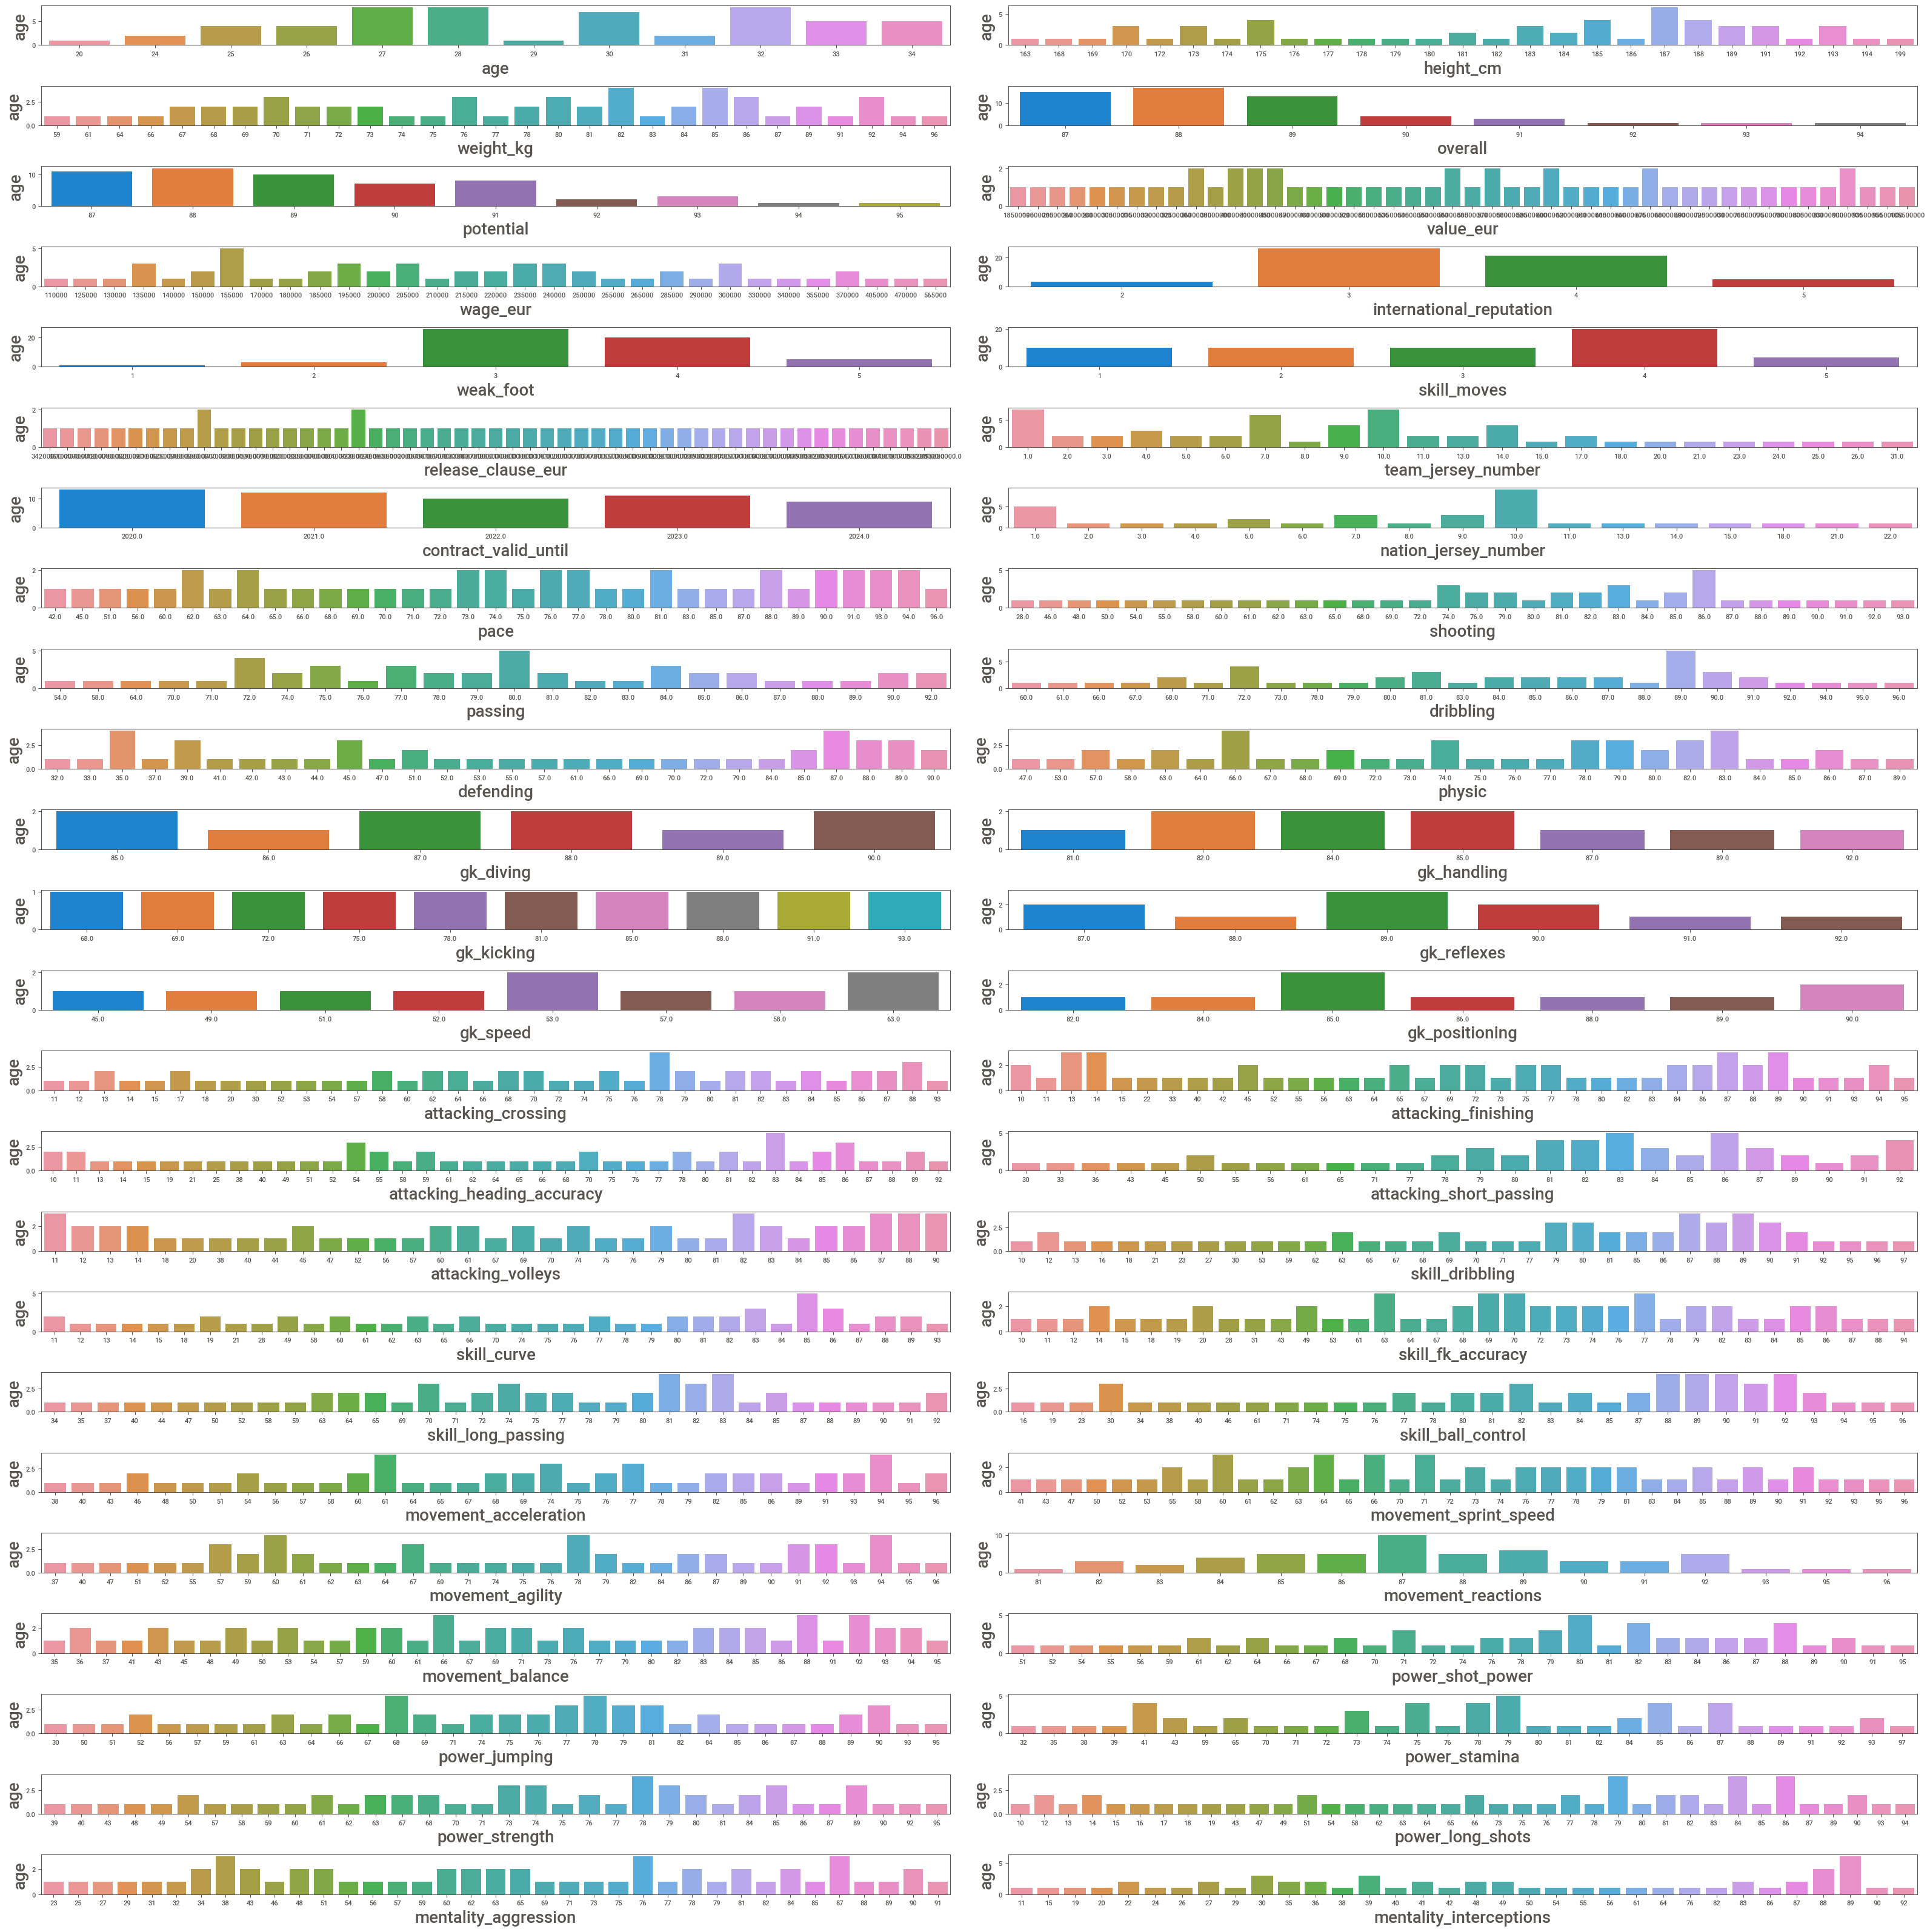

In [51]:
## Visualize summary of the distribution of values in each column of the fifa1 dataset, which can help identify any patterns or outliers

plt.figure(figsize=(32,32))
plotnumber=1
for i in df1:
    if plotnumber<=48:
        ax=plt.subplot(24,2,plotnumber)
        sns.countplot(x=df1[i].dropna(axis=0))
        plt.xlabel(i,fontsize=20)
        plt.ylabel('age',fontsize=20)
    plotnumber+=1
plt.tight_layout()

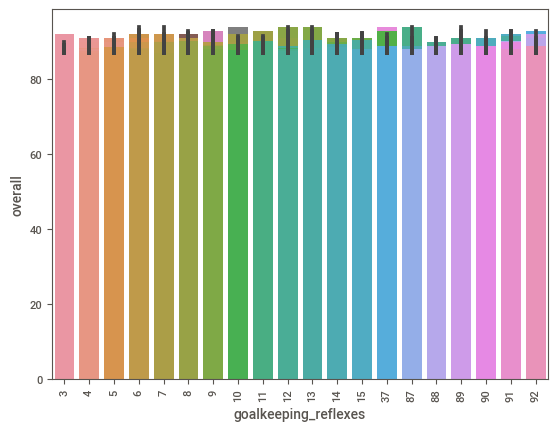

In [52]:
for i in df1:
    sns.barplot(data=df1,x=df1[i],y='overall')
    plt.xticks(rotation='90')

## Exploratory Data Analysis == EDA

### Univariate aalysis

In [54]:
df1.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_visio

<AxesSubplot:xlabel='overall', ylabel='count'>

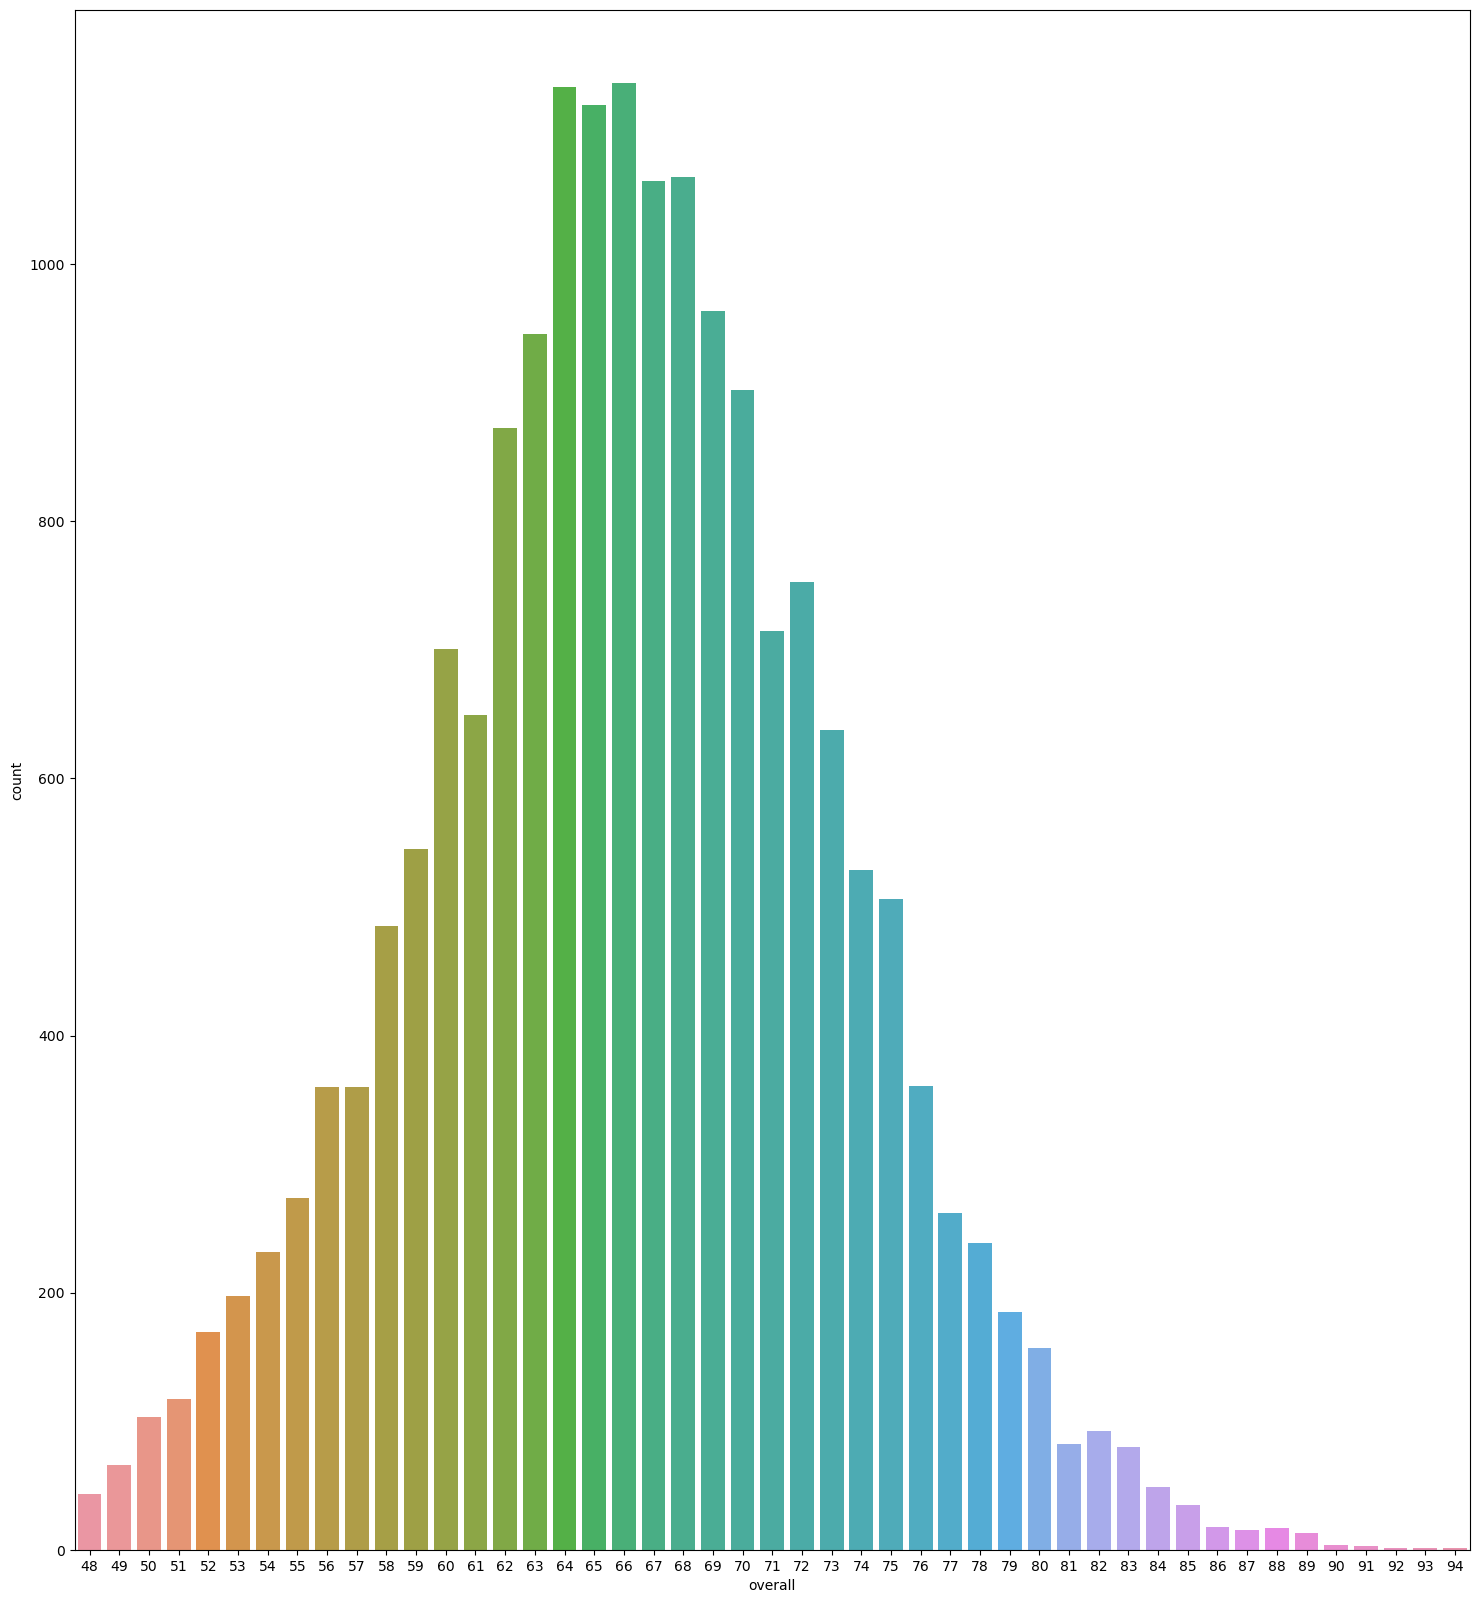

In [32]:
# target is catagorical/ discret so using count plot
# check wether data is balence or not
plt.figure(figsize=(18,20))
sns.countplot(data=df,x='overall')

* The overall is starting from 48 
* By this overall we can analyze that when it comes to their overall talent and international reputation rating 
  59 to 75 is more
* When over is lesser then the overall talent and international reputation is more
* when the overall as increase after the 70 the count of overall talent and international reputation is gradually decreasing


<AxesSubplot:xlabel='potential', ylabel='count'>

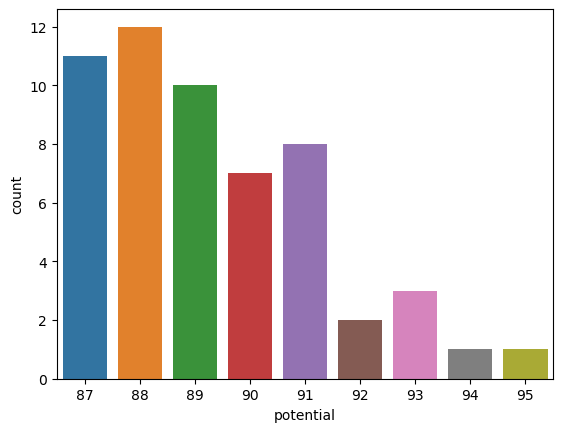

In [35]:
sns.countplot(data=df1,x='potential')
# Potential: Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.

* When it comes to  Potential of players we can analyse the as below
* when increase in the potential decrease in the rating of player

<AxesSubplot:xlabel='wage_eur', ylabel='Count'>

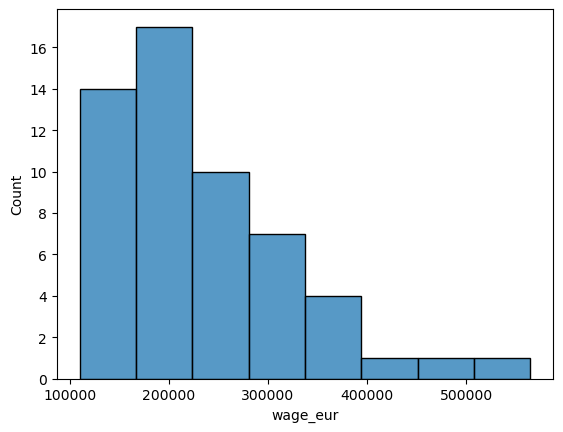

In [36]:
sns.histplot(data=df1,x='wage_eur')

* when it comes to wages it shows that 
* More the wages the lesser the number of players we can see
* By this we can analyse that the lesser the players will getting the high wages

<AxesSubplot:xlabel='international_reputation', ylabel='Count'>

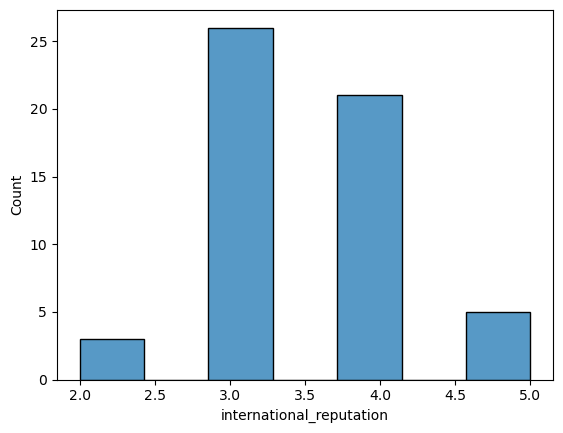

In [37]:
sns.histplot(data=df1,x='international_reputation')

* By looking at international reputation we can analyse as below
* BY seeing the distribution 3%  players are got more reputation and 4% slightly low
* 2 to 3 and 4 to 5 pecrentage players are getting less reputation

<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

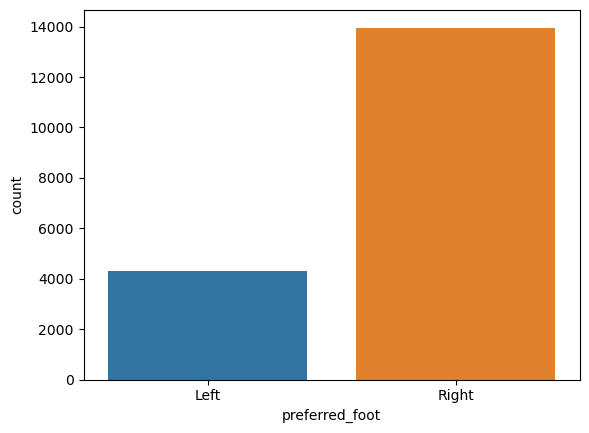

In [38]:
sns.countplot(data=df,x='preferred_foot')

* By looking preferred foot of playes we can analyse as below
* More the players are using their right leg to take the goals
* And lesser the players are using left leg to take goals

## Bivariate Analysis

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

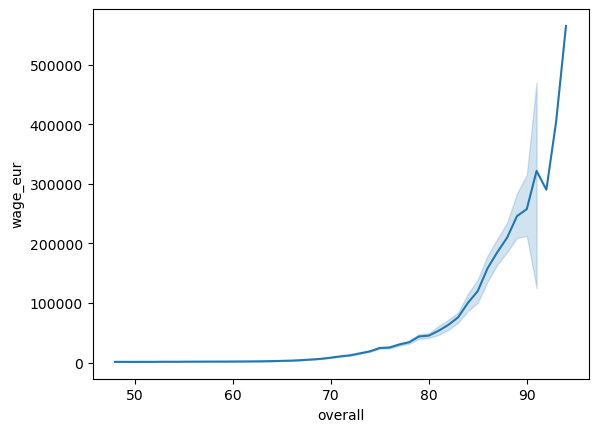

In [40]:
sns.lineplot(data=df,x='overall',y='wage_eur')

* By comparing overall with wages we can analyse that
* when overall talent and international reputation is increase we can see that getting wages is also more
* Lesser the reputation and talent getting lesser wages

### Players from top ten countries

In [67]:
df['nationality'].value_counts().iloc[:10]

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

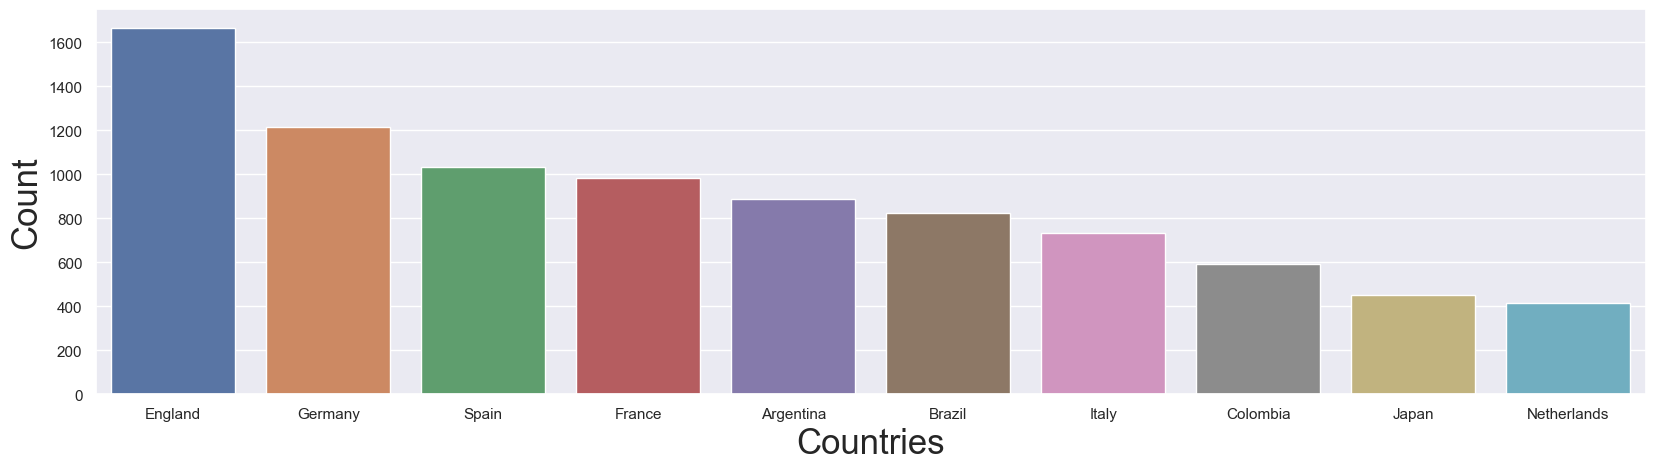

In [106]:
plt.figure(figsize=(20,5))
sns.countplot(x='nationality',data=df,order=df.nationality.value_counts().iloc[:10].index)
plt.xlabel('Countries',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.xticks()
plt.show()

* By above we can conclude that the top 10 countries in FIFA 20
* At first we can see that England got the first and followed by Germany,and Spain,France .....
* At the end of tenth position the Netherland present

In [90]:
data_top_rated = df.sort_values(by=["overall"], ascending=False)
data_top_rated.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?m

In [115]:
df.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

In [3]:
df2=df[['short_name','wage_eur','player_positions']].sort_values(by='wage_eur',ascending=False)
df2.head(10)

,short_name,wage_eur,player_positions
0,L. Messi,565000,"RW, CF, ST"
4,E. Hazard,470000,"LW, CF"
1,Cristiano Ronaldo,405000,"ST, LW"
5,K. De Bruyne,370000,"CAM, CM"
22,A. Griezmann,370000,"CF, ST, LW"
19,L. Suárez,355000,ST
8,L. Modrić,340000,CM
36,T. Kroos,330000,CM
17,S. Agüero,300000,ST
21,Sergio Busquets,300000,"CDM, CM"


In [162]:
#df.wage_eur.sort_values(ascending=False)
#df.player_positions.sort_values(ascending=False)

------Based on wages with respect to short name of players ------


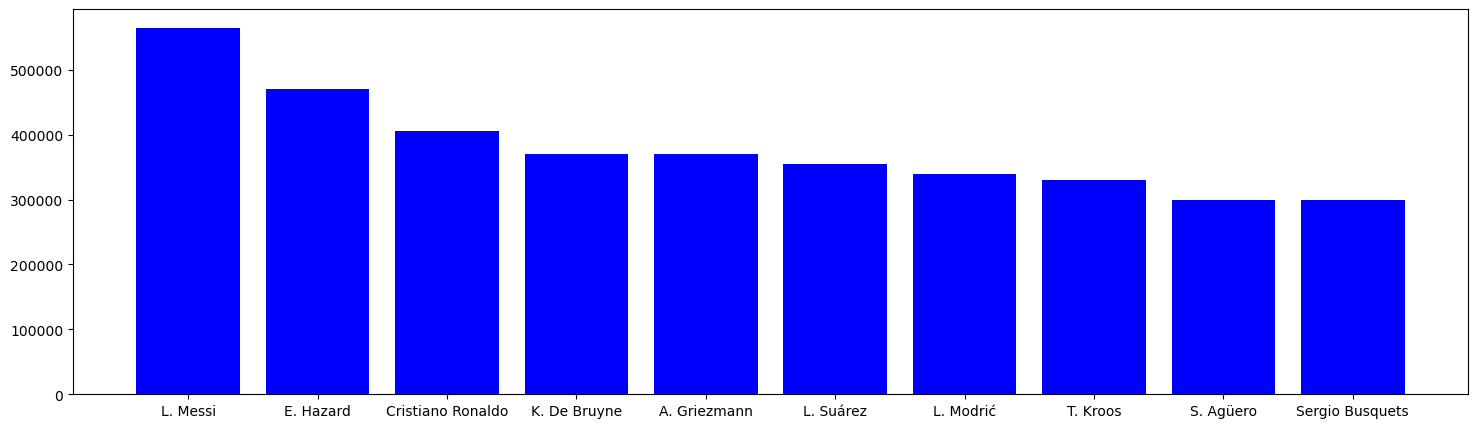

-------Based on the players position with respect to wages ----------


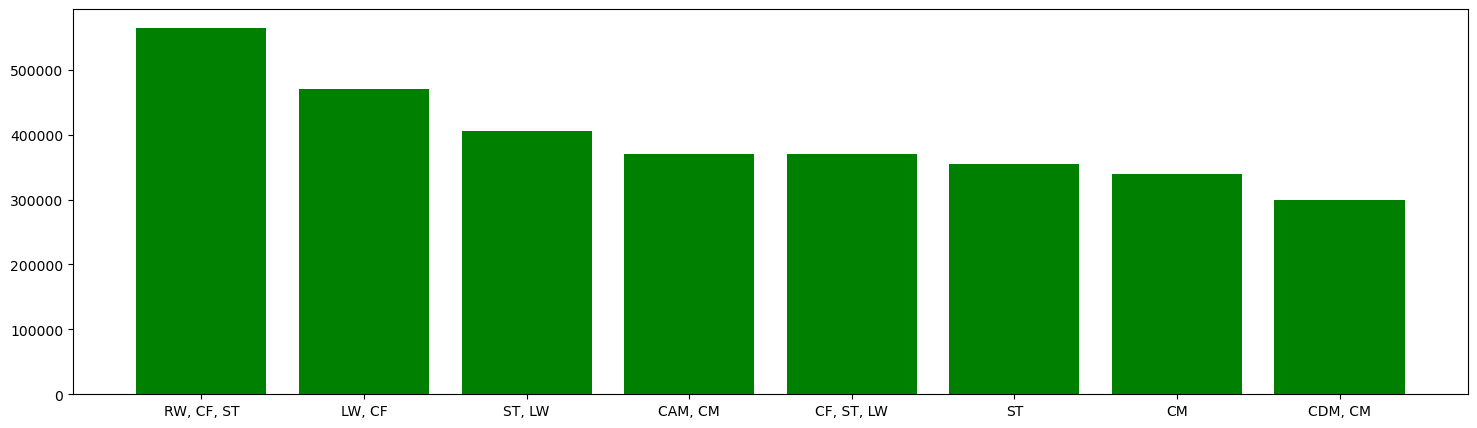

In [22]:
print("------Based on wages with respect to short name of players ------")

plt.figure(figsize=(18,5))
plt.bar(list(df2['short_name'])[0:10],list(df2['wage_eur'])[0:10],color='b')
plt.show()

print("-------Based on the players position with respect to wages ----------")

plt.figure(figsize=(18,5))
plt.bar(list(df2['player_positions'])[0:10],list(df2['wage_eur'])[0:10],color='g')
plt.show()

* By looking the above plot we can conclude that 
* The highest wages getting by L.messi,and E.Hazard followed by Cristiano Ronaldo are the top three players geeting high payment
* And we can see that the higest paying for the player has trhe position of RW,CF,ST

In [3]:
def transform_positions(df):
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
        df.loc[df['player_position'] == i , 'player_position'] = 'Striker' 
    
    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
        df.loc[df['player_position'] == i , 'player_position'] = 'Midfielder' 
    
    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB','GK']:
        df.loc[df['player_position'] == i , 'player_position'] = 'Defender'

In [4]:
def select_pos(col):
    new_val=[]
    for i in col:
        x=str(i).split(',')[0]
        new_val.append(x)
    return new_val

In [5]:
df['player_position']=select_pos(df['player_positions'])
df.drop(['player_positions'],axis=1,inplace=True)
transform_positions(df)

In [6]:
df['player_position'].unique()

array(['Striker', 'Defender', 'Midfielder'], dtype=object)

In [7]:
df.isnull().sum()

sofifa_id             0
player_url            0
short_name            0
long_name             0
age                   0
                   ... 
lcb                2036
cb                 2036
rcb                2036
rb                 2036
player_position       0
Length: 104, dtype: int64

In [8]:
# impute the null values
df["release_clause_eur"].fillna(value=df["release_clause_eur"].median(),inplace=True)
df["team_jersey_number"].fillna(value=df["team_jersey_number"].median(),inplace=True)
df["contract_valid_until"].fillna(value=df["contract_valid_until"].median(),inplace=True)
df["nation_position"].fillna("SUB",inplace=True)
df["team_position"].fillna("SUB",inplace=True)
df["nation_jersey_number"].fillna(value=df["nation_jersey_number"].median(),inplace=True)
df["pace"].fillna(value=df["pace"].median(),inplace=True)
df["shooting"].fillna(value=df["shooting"].median(),inplace=True)
df["passing"].fillna(value=df["passing"].median(),inplace=True)
df["dribbling"].fillna(value=df["dribbling"].median(),inplace=True)
df["defending"].fillna(value=df["defending"].median(),inplace=True)
df["physic"].fillna(value=df["physic"].median(),inplace=True)
df["gk_diving"].fillna(value=df["gk_diving"].median(),inplace=True)
df["gk_handling"].fillna(value=df["gk_handling"].median(),inplace=True)
df["gk_kicking"].fillna(value=df["gk_kicking"].median(),inplace=True)
df["gk_reflexes"].fillna(value=df["gk_reflexes"].median(),inplace=True)
df["gk_speed"].fillna(value=df["gk_speed"].median(),inplace=True)
df["gk_positioning"].fillna(value=df["gk_positioning"].median(),inplace=True)


In [9]:
df.isnull().sum()

sofifa_id             0
player_url            0
short_name            0
long_name             0
age                   0
                   ... 
lcb                2036
cb                 2036
rcb                2036
rb                 2036
player_position       0
Length: 104, dtype: int64

In [11]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
lower=q1-(1.5*IQR)
upper=q3+(1.5*IQR)
outlier=((df>upper)|(df<lower)).sum()
outlier

age                             19
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy    1068
attacking_short_passing       1734
                              ... 
value_eur                     2511
wage_eur                      2360
weak_foot                     6931
weight_kg                       73
work_rate                        0
Length: 104, dtype: int64

In [12]:
percentage=((outlier)/(len(df)))*100
percentage

age                            0.103950
attacking_crossing             0.000000
attacking_finishing            0.000000
attacking_heading_accuracy     5.843090
attacking_short_passing        9.486815
                                ...    
value_eur                     13.737827
wage_eur                      12.911697
weak_foot                     37.919904
weight_kg                      0.399387
work_rate                      0.000000
Length: 104, dtype: float64

In [16]:
print("percentage :",percentage[percentage<=0.6])

percentage : age                    0.103950
attacking_crossing     0.000000
attacking_finishing    0.000000
attacking_volleys      0.000000
body_type              0.000000
                         ...   
skill_moves            0.268082
st                     0.000000
team_position          0.000000
weight_kg              0.399387
work_rate              0.000000
Length: 66, dtype: float64


In [18]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.loc[:,["preferred_foot","work_rate","body_type","real_face","nation_position","team_position"]]=\
df.loc[:,["preferred_foot","work_rate","body_type","real_face","nation_position","team_position"]].apply(lc.fit_transform)

In [19]:
df3=df.drop(["sofifa_id","player_url","short_name","long_name","dob","nationality","club","player_tags","loaned_from","joined","player_traits","ls","st","rs",
         "lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm","cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","player_position"],axis=1)

In [20]:
df3

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,0,5,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,1,5,4,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,1,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,1,3,3,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,1,4,4,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,40000,2000,1,1,3,...,39,41,45,50,52,5,5,13,5,14
18274,22,177,66,48,56,40000,2000,1,1,2,...,37,35,42,53,57,13,6,14,11,9
18275,19,186,75,48,56,40000,1000,1,1,2,...,36,39,46,52,46,7,8,10,6,14
18276,18,185,74,48,54,40000,1000,1,1,2,...,36,40,39,44,54,14,9,13,13,13


In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(df3)

array([[ 1.44233274, -1.68159832, -0.46489103, ..., -0.07301019,
        -0.1381906 , -0.48287516],
       [ 1.87180879,  0.83439432,  1.0959349 , ..., -0.07301019,
        -0.1381906 , -0.31655621],
       [ 0.36864262, -0.94160048, -1.0324641 , ..., -0.07301019,
        -0.07983402, -0.31655621],
       ...,
       [-1.34926158,  0.68639475, -0.03921123, ..., -0.3739755 ,
        -0.60504324, -0.15023727],
       [-1.5639996 ,  0.53839519, -0.1811045 , ..., -0.19339631,
        -0.19654718, -0.20567692],
       [ 0.15390459,  0.09439648,  0.38646857, ..., -0.13320325,
        -0.4299735 , -0.37199586]])

In [22]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow method')

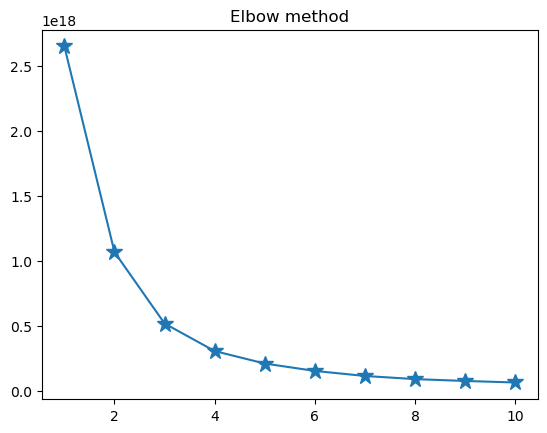

In [23]:
wcss=[]
for i in range (1,11):
    model=KMeans(n_clusters=i,random_state=10,max_iter=1000)
    model.fit(df3)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss,marker='*',markersize=12)
plt.title('Elbow method')

In [24]:
from sklearn.metrics import silhouette_score
model=KMeans(n_clusters=3,algorithm='auto',max_iter=1000,random_state=10)
model.fit(df3)
model.labels_
silhouette_score(df3,model.labels_)

0.8267051703049333

In [47]:
from sklearn.cluster import AgglomerativeClustering
hierachical_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels1 = hierachical_clustering.fit_predict(df3)
score1=silhouette_score(df3,labels1)
print(f'Hierarchical Clustering Silhouette score: {score1:.2f}')

Hierarchical Clustering Silhouette score: 0.83


In [30]:
df3['cluster']=pd.DataFrame(model.labels_)


In [28]:
df3['cluster']

0        1
1        1
2        1
3        1
4        1
        ..
18273    0
18274    0
18275    0
18276    0
18277    0
Name: cluster, Length: 18278, dtype: int32

In [31]:
df['cluster']=pd.DataFrame(model.labels_)
df4=df[['short_name','cluster']]
df4

,short_name,cluster
0,L. Messi,1
1,Cristiano Ronaldo,1
2,Neymar Jr,1
3,J. Oblak,1
4,E. Hazard,1
...,...,...
18273,Shao Shuai,0
18274,Xiao Mingjie,0
18275,Zhang Wei,0
18276,Wang Haijian,0


In [32]:
df4.to_csv('result')

In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
a=pca.fit_transform(df3)
a

array([[ 2.12659951e+08, -5.26832736e+06],
       [ 1.07460859e+08,  7.48571192e+06],
       [ 2.16720606e+08,  3.88886100e+06],
       ...,
       [-5.04812919e+06, -1.40645301e+05],
       [-5.04812919e+06, -1.40645301e+05],
       [-4.04443025e+06, -6.59768417e+05]])

In [39]:
new_data=pd.DataFrame(a,columns=['component1','component2'])

In [40]:
new_data

,component1,component2
0,2.126600e+08,-5.268327e+06
1,1.074609e+08,7.485712e+06
2,2.167206e+08,3.888861e+06
3,1.767662e+08,-6.970036e+06
4,2.000961e+08,-4.962545e+06
...,...,...
18273,-5.048128e+06,-1.406428e+05
18274,-5.046351e+06,-1.415616e+05
18275,-5.048129e+06,-1.406453e+05
18276,-5.048129e+06,-1.406453e+05


In [43]:
final=pd.concat([new_data,df3],axis=1)
final

,component1,component2,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster
0,2.126600e+08,-5.268327e+06,32,170,72,94,94,95500000,565000,0,...,96,33,37,26,6,11,15,14,8,1
1,1.074609e+08,7.485712e+06,34,187,83,93,93,58500000,405000,1,...,95,28,32,24,7,11,15,14,11,1
2,2.167206e+08,3.888861e+06,27,175,68,92,92,105500000,290000,1,...,94,27,26,29,9,9,15,15,11,1
3,1.767662e+08,-6.970036e+06,26,188,87,91,93,77500000,125000,1,...,68,27,12,18,87,92,78,90,89,1
4,2.000961e+08,-4.962545e+06,28,175,74,91,91,90000000,470000,1,...,91,34,27,22,11,12,6,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,-5.048128e+06,-1.406428e+05,22,186,79,48,56,40000,2000,1,...,41,45,50,52,5,5,13,5,14,0
18274,-5.046351e+06,-1.415616e+05,22,177,66,48,56,40000,2000,1,...,35,42,53,57,13,6,14,11,9,0
18275,-5.048129e+06,-1.406453e+05,19,186,75,48,56,40000,1000,1,...,39,46,52,46,7,8,10,6,14,0
18276,-5.048129e+06,-1.406453e+05,18,185,74,48,54,40000,1000,1,...,40,39,44,54,14,9,13,13,13,0
